Text(0, 0.5, 'position(m)')

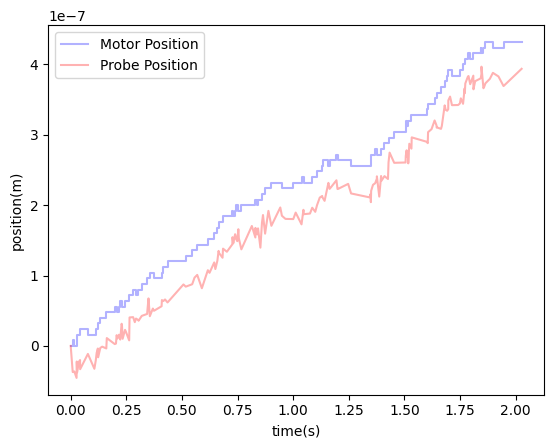

In [ ]:
import numpy as np
import matplotlib.pyplot as plt




#rate constants
kf0 = 981
kb0 = 22.8


kc = 129
df = 3.3
db = 0.47


def gillespie_3state_diffusion(F0,k1, k2, k3, tmax,x0):
    gamma =3.1e-8
    k = 0.075e-3
    df =3.3e-9
    db = 0.47e-9
    kb = 1.38e-23
    T = 300
    Diff = kb*T/gamma
    #x = np.random.randn()*np.sqrt(Diff*gamma/k)
    #x_p = np.random.randn()*np.sqrt(Diff*gamma/k)



    #initialization
    x = x0
    x_p = x0
    t = 0
    tvec = [t]
    xpvec = [x_p]
    xvec = [x]
    forces =[k*(x_p - x)]
    states =[0]
    reactions = [0]
    count = 0




    while t<tmax:
        count += 1
        force = k*(x_p - x)
        a1 = k1
        a2 = k2 *np.exp(force*df/(kb*T))
        a3 = k3 *np.exp(force*db/(kb*T))






        if states[-1] == 0:
            a0  = k1
            r2_threshold = 1

        else:
            a0 = k2 *np.exp(force*df/(kb*T)) + k3 *np.exp(force*db/(kb*T)) #a0
            r2_threshold = k2 *np.exp(force*df/(kb*T))/a0




        r1 = np.random.rand()
        r2 = np.random.rand()
        tau = 1/a0 * np.log(1/r1)
        t += tau




        if states[-1] == 0:
            x += 0
            states.append(1)
            reactions.append(0)

        else:
            if r2 < r2_threshold:
                x += 8e-9
                states.append(0)
                reactions.append(1)

            else:
                x -= 8e-9
                states.append(0)
                reactions.append(2)





        dt = 1e-4
        num_steps = int(tau/dt)

        for i in range(num_steps):
            x_p = x_p - dt*k*(x_p-x)/gamma +  dt*F0/gamma +  np.sqrt(2*Diff*dt)*np.random.randn()

        tvec.append(t)
        xvec.append(x)
        xpvec.append(x_p)
        forces.append(k*(x_p - x))

    return tvec, xvec, xpvec, forces






for i in range(1):
    tvec, xvec, xpvec,forces = gillespie_3state_diffusion(-3e-12,kc, kf0, kb0,  2,0)
    plt.step(tvec,xvec, color='blue' ,alpha=0.3,label="Motor Position")
    plt.plot(tvec,xpvec, color='red' ,alpha=0.3,label="Probe Position")
plt.legend()
plt.xlabel('time(s)')
plt.ylabel('position(m)')


Text(0, 0.5, 'Velocity (nm/s)')

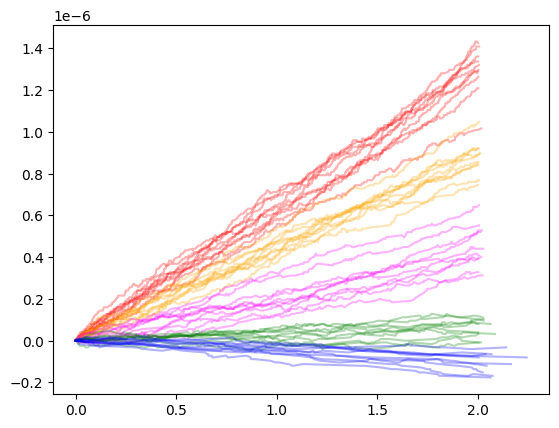

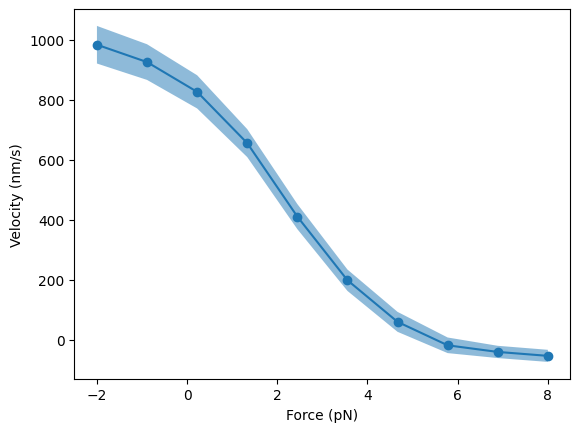

In [ ]:

for i in range(10):
    tvec, xvec, xpvec, forces = gillespie_3state_diffusion(-1.5e-12,kc, kf0, kb0, 2,0)
    plt.plot(tvec, xvec, color='red', alpha=0.3)
for i in range(10):
    tvec, xvec, xpvec, forces = gillespie_3state_diffusion(-2.5e-12,kc, kf0, kb0, 2,0)
    plt.plot(tvec, xvec, color='orange', alpha=0.3)
for i in range(10):
    tvec, xvec, xpvec, forces = gillespie_3state_diffusion(-3.5e-12,kc, kf0, kb0, 2,0)
    plt.plot(tvec, xvec, color='magenta', alpha=0.3)
for i in range(10):
    tvec, xvec, xpvec, forces = gillespie_3state_diffusion(-5e-12,kc, kf0, kb0, 2,0)
    plt.plot(tvec, xvec, color='green', alpha=0.3)
for i in range(10):
    tvec, xvec, xpvec, forces = gillespie_3state_diffusion(-7.5e-12,kc, kf0, kb0, 2,0)
    plt.plot(tvec, xvec, color='blue', alpha=0.3)

def find_velocity(F0, num_runs):
    velocities = []

    for i in range(num_runs):
        tvec, xvec, xpvec,forces = gillespie_3state_diffusion(F0,kc, kf0, kb0, 2,0)
        velocities.append((xpvec[-1]-xpvec[10])/(tvec[-1]-tvec[10]))

    return np.mean(velocities), np.mean(forces[10:]), np.std(velocities), np.std(forces[10:])





F0s = np.linspace(-8e-12,2e-12, 10)
velocities = []
forces_vec = []
velocity_std = []

for F0 in F0s:
    velocities.append(find_velocity(F0, 100)[0])
    forces_vec.append(F0)
    velocity_std.append(find_velocity(F0, 100)[2])

velocities = np.array(velocities)*1e9
forces_vec =- np.array(forces_vec)*1e12
velocity_std = np.array(velocity_std)*1e9

plt.figure()
plt.plot(forces_vec, velocities,'-o')
#plot fillbetween for the error

plt.fill_between(forces_vec, velocities-velocity_std, velocities+velocity_std, alpha=0.5)
plt.xlabel('Force (pN)')
plt.ylabel('Velocity (nm/s)')
#plt.plot(-F0s, velocities,'-o')